<a href="https://colab.research.google.com/github/ashok2216-A/Data_Analytics/blob/main/coursera_rank_predition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
#plt.style.use('dark_background')
plt.rc('figure', figsize=(22,12))
plt.rc('lines', markersize=8)
plt.rc('font', size=15)
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
os.environ['KAGGLE_USERNAME'] = "ashokkumarbibbab"
os.environ['KAGGLE_KEY'] = "8fd1b9e7c79e7a738c2d1385bb7643de"

In [ ]:
!kaggle datasets download -d ruchi798/coursera-global-skills-2021

  0% 0.00/14.8k [00:00<?, ?B/s]
100% 14.8k/14.8k [00:00<00:00, 23.5MB/s]


In [ ]:
from zipfile import ZipFile

file_path = '/content/coursera-global-skills-2021.zip'
with ZipFile(file_path, 'r') as zip:
  print('Extracting...')
  zip.extractall()
  print('Done')

Extracting...
Done


In [ ]:
asia_ranking = pd.read_csv('/content/AsiaPacific_Ranking.csv')
asia_ranking.head(5)

,Region,Business,Technology,Data Science,Overall Rank,Overall Rank Business,Overall Rank Technology,Overall Rank Data Science
0,Australia,0.31,0.61,0.74,44,75,44,29
1,Bangladesh,0.59,0.38,0.38,64,46,67,67
2,Bhutan,0.18,0.14,0.03,100,89,93,106
3,China,0.85,0.21,0.81,39,17,85,21
4,Hong Kong,0.86,0.51,0.92,23,16,54,10


In [ ]:
asia_ranking.isna().sum()

Region                       0
Business                     0
Technology                   0
Data Science                 0
Overall Rank                 0
Overall Rank Business        0
Overall Rank Technology      0
Overall Rank Data Science    0
dtype: int64

In [ ]:
asia_ranking.duplicated().sum()

0

In [ ]:
asia_ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Region                     23 non-null     object 
 1   Business                   23 non-null     float64
 2   Technology                 23 non-null     float64
 3   Data Science               23 non-null     float64
 4   Overall Rank               23 non-null     int64  
 5   Overall Rank Business      23 non-null     int64  
 6   Overall Rank Technology    23 non-null     int64  
 7   Overall Rank Data Science  23 non-null     int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 1.6+ KB


In [ ]:
asia_ranking.describe()

,Business,Technology,Data Science,Overall Rank,Overall Rank Business,Overall Rank Technology,Overall Rank Data Science
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.00000,23.000000
mean,0.476087,0.516087,0.505217,54.478261,57.521739,52.73913,53.521739
std,0.232433,0.258435,0.268055,27.354357,24.899561,27.52060,28.804781
min,0.040000,0.060000,0.030000,4.000000,14.000000,1.00000,10.000000
25%,0.320000,0.365000,0.335000,39.500000,43.500000,34.50000,26.000000
50%,0.490000,0.500000,0.490000,62.000000,56.000000,55.00000,54.000000
75%,0.610000,0.695000,0.765000,72.500000,74.000000,68.50000,71.500000
max,0.880000,1.000000,0.920000,104.000000,105.000000,102.00000,106.000000


In [ ]:
# |character      |  |  |  |description |
# |-------------|   -------------------------------|
# |'.'       | | | |point marker|
# |','       | | | |pixel marker|
# |'o'       | | | |circle marker|
# |'v'       | | | |triangle_down marker|
# |'^'       | | | |triangle_up marker|
# |'<'       | | | |triangle_left marker|
# |'>'       | | | |triangle_right marker|
# |'1'       | | | |tri_down marker|
# |'2'       | | | |tri_up marker|
# |'3'       | | | |tri_left marker|
# |'4'       | | | |tri_right marker|
# |'s'       | | | |square marker|
# |'p'       | | | |pentagon marker|
# |'*'       | | | |star marker|
# |'h'       | | | |hexagon1 marker|
# |'H'       | | | |hexagon2 marker|
# |'+'       | | | |plus marker|
# |'x'       | | | |x marker|
# |'D'       | | | |diamond marker|
# |'d'       | | | |thin_diamond marker|
# |'|'       | | | |vline marker|
# |'_'       | | | |hline marker|

# **Line Styles**

# |character      |  |  |  |description |
# |-------------|   -------------------------------|
# |'-'       | | | |solid line style|
# |'--'      | | | |dashed line style|
# |'-.'      | | | |dash-dot line style|
# |':'       | | | |dotted line style|

# Example format strings:

# 'b'    # blue markers with default shape
# 'or'   # red circles
# '-g'   # green solid line
# '--'   # dashed line with default color
# '^k:'  # black triangle_up markers connected by a dotted line
# **Colors**

# The supported color abbreviations are the single letter codes

# |character      |  |  |  |color |
# |-------------|   -------------------------------|
# |'b'       | | | |blue|
# |'g'       | | | |green|
# |'r'       | | | |red|
# |'c'       | | | |cyan|
# |'m'       | | | |magenta|
# |'y'       | | | |yellow|
# |'k'       | | | |black|
# |'w'       | | | |white|

# and the 'CN' colors that index into the default property cycle.

# If the color is the only part of the format string, you can
# additionally use any  matplotlib.colors spec, e.g. full names
# ('green') or hex strings ('#008000').

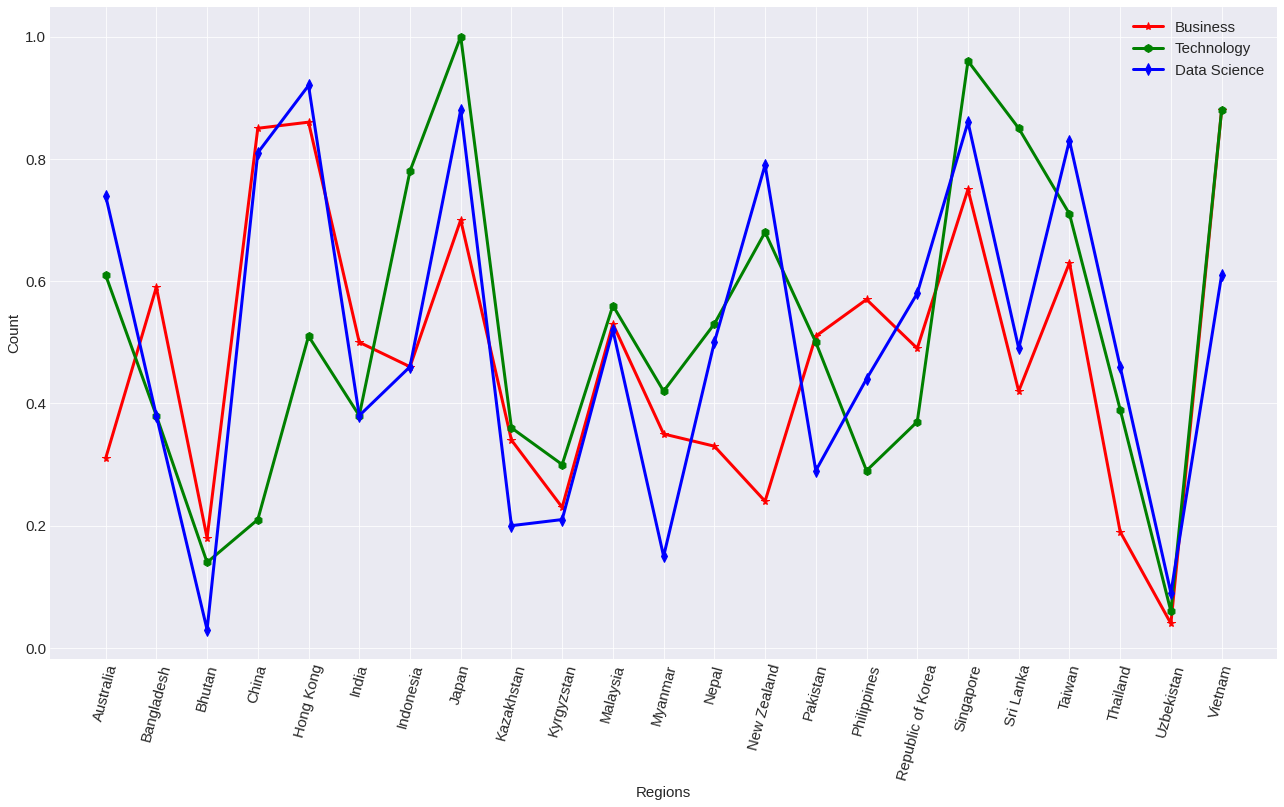

In [ ]:
plt.xticks(rotation=75)
plt.plot(asia_ranking['Region'], asia_ranking['Business'], '*-', color='red', linewidth=3, markersize=8)
plt.plot(asia_ranking['Region'], asia_ranking['Technology'], 'h-', color='green', linewidth=3, markersize=8)
plt.plot(asia_ranking['Region'], asia_ranking['Data Science'], 'd-', color='blue', linewidth=3, markersize=8)
plt.xlabel('Regions')
plt.ylabel('Count')
plt.legend(['Business', 'Technology', 'Data Science'])

In [ ]:
asia_ranking.head(5)

,Region,Business,Technology,Data Science,Overall Rank,Overall Rank Business,Overall Rank Technology,Overall Rank Data Science
0,Australia,0.31,0.61,0.74,44,75,44,29
1,Bangladesh,0.59,0.38,0.38,64,46,67,67
2,Bhutan,0.18,0.14,0.03,100,89,93,106
3,China,0.85,0.21,0.81,39,17,85,21
4,Hong Kong,0.86,0.51,0.92,23,16,54,10


Text(0, 0.5, 'Overall Rank')

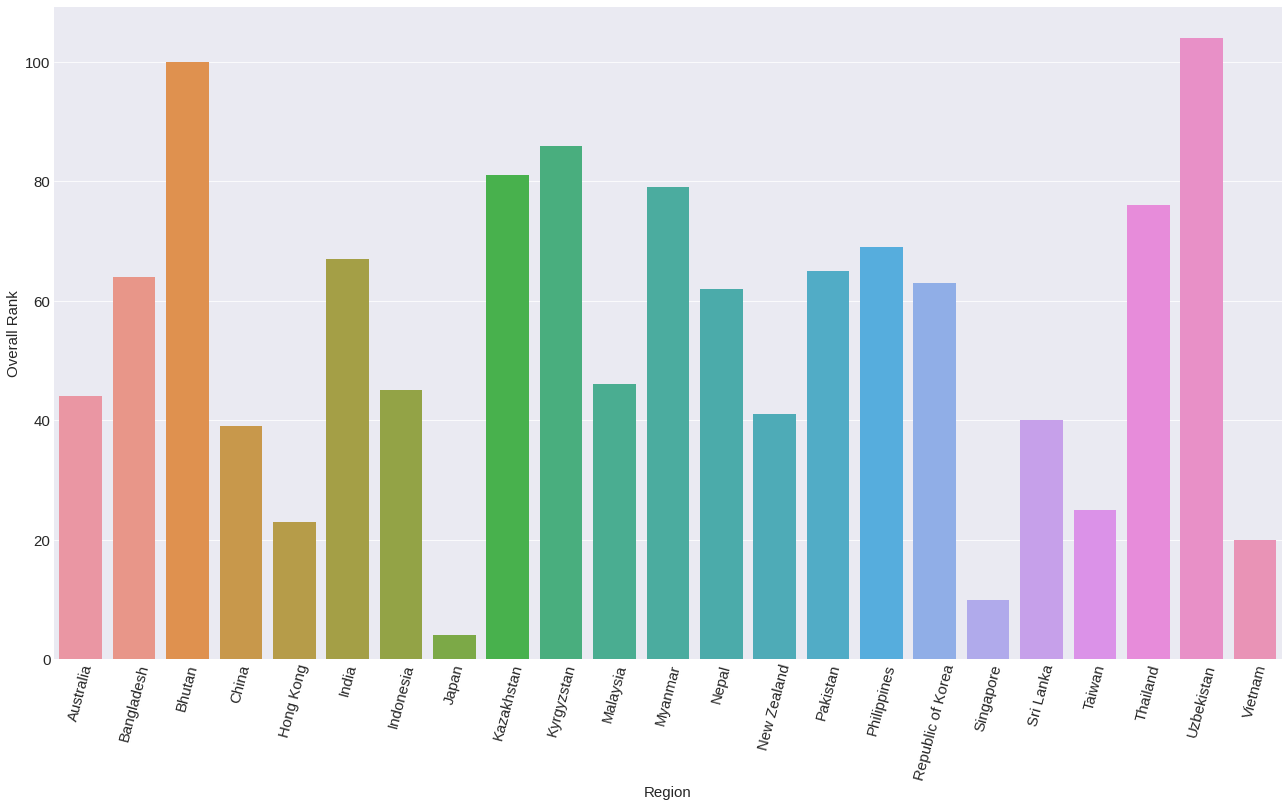

In [ ]:
plt.xticks(rotation=75)
sns.barplot(asia_ranking['Region'], asia_ranking['Overall Rank'])
plt.xlabel('Region')
plt.ylabel('Overall Rank')

Text(0, 0.5, 'Overall rank')

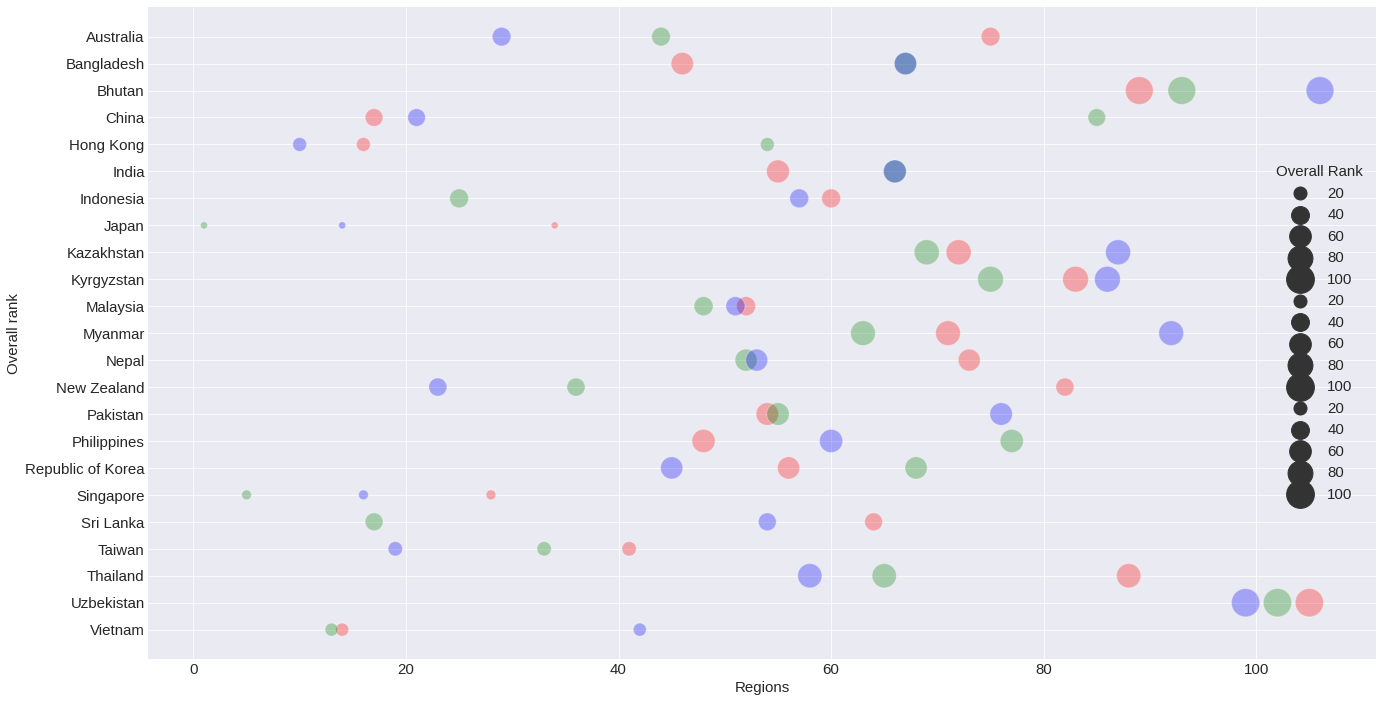

In [ ]:
sns.scatterplot(asia_ranking['Overall Rank Business'], asia_ranking['Region'],
                                  color='red',size=asia_ranking['Overall Rank'],sizes=(50,800), alpha=0.3)
sns.scatterplot(asia_ranking['Overall Rank Technology'], asia_ranking['Region'],
                                        color='green', size=asia_ranking['Overall Rank'], sizes=(50,800), alpha=0.3)
sns.scatterplot(asia_ranking['Overall Rank Data Science'], asia_ranking['Region'],
                                                color='blue', size=asia_ranking['Overall Rank'], sizes=(50,800), alpha=0.3)
plt.xlabel('Regions')
plt.ylabel('Overall rank')


In [ ]:
asiapaci_skills = pd.read_csv('/content/AsiaPacific_Skills.csv')
asiapaci_skills.head(5)

,Region,Accounting,Communications,Entrepreneurship,Finance,Human Resources,Leadership,Marketing,Sales,Strategy &\nOperations,Cloud Computing,Computer Networking,Computer Programming,Databases,Mobile Development,Operating Systems,Security Engineering,Software Engineering,Theoretical Computer Science,Web Development,Data Analysis,Data Management,Data Visualization,Machine Learning,Mathematics,Probability & Statistics,Statistical Programming
0,Australia,0.40,0.22,0.13,0.65,0.19,0.35,0.50,0.54,0.42,0.79,0.55,0.59,0.55,0.34,0.54,0.70,0.67,0.58,0.35,0.83,0.97,0.88,0.61,0.67,0.60,0.46
1,Bangladesh,0.34,0.76,0.95,0.51,0.40,0.69,0.41,0.64,0.68,0.93,0.88,0.13,0.26,0.11,0.34,0.45,0.22,0.29,0.40,0.60,0.38,0.65,0.35,0.41,0.46,0.23
2,Bhutan,0.29,0.10,0.38,0.63,0.04,0.24,0.21,0.71,0.04,0.02,0.54,0.02,0.03,0.13,0.28,0.98,0.10,0.68,0.06,0.08,0.02,0.24,0.03,0.07,0.10,0.30
3,China,0.80,0.85,0.76,0.88,0.93,0.71,0.67,0.52,0.38,0.25,0.01,0.60,0.96,0.31,0.05,0.27,0.27,0.96,0.14,0.35,0.86,0.72,0.86,0.95,0.92,0.41
4,Hong Kong,0.67,0.70,0.75,0.96,0.85,0.73,0.80,0.73,0.59,0.71,0.20,0.54,0.53,0.60,0.21,0.30,0.46,0.92,0.65,0.58,0.71,0.96,0.88,0.98,0.87,0.70


In [ ]:
print(asiapaci_skills.isna().sum())
print('duplicated',asiapaci_skills.duplicated().sum())

Region                          0
Accounting                      0
Communications                  0
Entrepreneurship                0
Finance                         0
Human Resources                 0
Leadership                      0
Marketing                       0
Sales                           0
Strategy &\nOperations          0
Cloud Computing                 0
Computer Networking             0
Computer Programming            0
Databases                       0
Mobile Development              0
Operating Systems               0
Security Engineering            0
Software Engineering            0
Theoretical Computer Science    0
Web Development                 0
Data Analysis                   0
Data Management                 0
Data Visualization              0
Machine Learning                0
Mathematics                     0
Probability & Statistics        0
Statistical Programming         0
dtype: int64
duplicated 0


In [ ]:
asiapaci_skills.describe()

,Accounting,Communications,Entrepreneurship,Finance,Human Resources,Leadership,Marketing,Sales,Strategy &\nOperations,Cloud Computing,Computer Networking,Computer Programming,Databases,Mobile Development,Operating Systems,Security Engineering,Software Engineering,Theoretical Computer Science,Web Development,Data Analysis,Data Management,Data Visualization,Machine Learning,Mathematics,Probability & Statistics,Statistical Programming
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,0.370000,0.619565,0.535652,0.494783,0.493913,0.490435,0.453913,0.530435,0.449565,0.712609,0.620870,0.450870,0.416522,0.353913,0.415217,0.493478,0.434783,0.551304,0.492609,0.410000,0.520870,0.479130,0.533913,0.591739,0.506522,0.509130
std,0.238003,0.285903,0.276912,0.253608,0.314118,0.218871,0.214852,0.203302,0.241783,0.309813,0.295695,0.290484,0.235055,0.216117,0.220884,0.274534,0.202167,0.254564,0.281541,0.276636,0.272979,0.305181,0.259050,0.255034,0.288769,0.273661
min,0.020000,0.060000,0.030000,0.080000,0.040000,0.050000,0.050000,0.030000,0.020000,0.020000,0.010000,0.020000,0.030000,0.100000,0.020000,0.040000,0.100000,0.110000,0.040000,0.010000,0.020000,0.010000,0.030000,0.070000,0.040000,0.050000
25%,0.175000,0.475000,0.355000,0.305000,0.240000,0.320000,0.305000,0.380000,0.285000,0.615000,0.470000,0.205000,0.240000,0.185000,0.235000,0.285000,0.285000,0.365000,0.290000,0.160000,0.330000,0.225000,0.360000,0.390000,0.275000,0.295000
50%,0.400000,0.700000,0.610000,0.480000,0.420000,0.500000,0.450000,0.540000,0.460000,0.830000,0.610000,0.460000,0.420000,0.290000,0.400000,0.390000,0.400000,0.530000,0.540000,0.390000,0.450000,0.460000,0.540000,0.570000,0.540000,0.450000
75%,0.530000,0.845000,0.730000,0.655000,0.865000,0.645000,0.580000,0.675000,0.600000,0.935000,0.880000,0.595000,0.555000,0.525000,0.575000,0.715000,0.545000,0.720000,0.680000,0.650000,0.710000,0.685000,0.740000,0.750000,0.750000,0.705000
max,0.800000,0.990000,1.000000,0.960000,0.960000,0.980000,0.920000,0.900000,0.990000,1.000000,0.990000,0.950000,0.960000,0.770000,0.790000,0.980000,0.890000,0.970000,0.960000,0.830000,0.970000,0.980000,0.960000,1.000000,0.960000,0.960000


In [ ]:
asiapaci_skills.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Region                        23 non-null     object 
 1   Accounting                    23 non-null     float64
 2   Communications                23 non-null     float64
 3   Entrepreneurship              23 non-null     float64
 4   Finance                       23 non-null     float64
 5   Human Resources               23 non-null     float64
 6   Leadership                    23 non-null     float64
 7   Marketing                     23 non-null     float64
 8   Sales                         23 non-null     float64
 9   Strategy &
Operations         23 non-null     float64
 10  Cloud Computing               23 non-null     float64
 11  Computer Networking           23 non-null     float64
 12  Computer Programming          23 non-null     float64
 13  Databas

In [ ]:
asiapaci_skills.shape

(23, 27)

In [ ]:
asiapaci_skills.columns

Index(['Region', 'Accounting', 'Communications', 'Entrepreneurship', 'Finance',
       'Human Resources', 'Leadership', 'Marketing', 'Sales',
       'Strategy &\nOperations', 'Cloud Computing', 'Computer Networking',
       'Computer Programming', 'Databases', 'Mobile Development',
       'Operating Systems', 'Security Engineering', 'Software Engineering',
       'Theoretical Computer Science', 'Web Development', 'Data Analysis',
       'Data Management', 'Data Visualization', 'Machine Learning',
       'Mathematics', 'Probability & Statistics', 'Statistical Programming'],
      dtype='object')

No handles with labels found to put in legend.


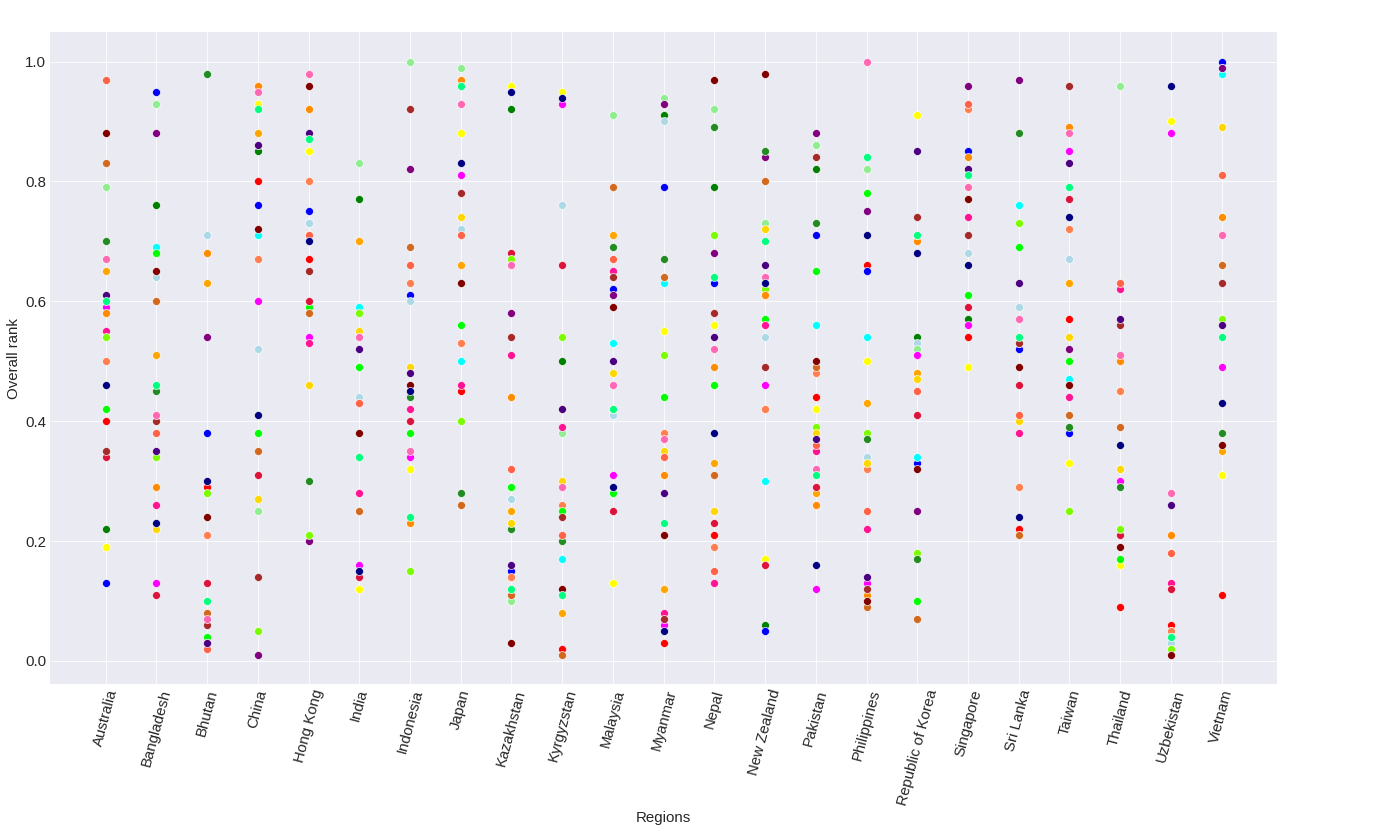

In [ ]:
plt.xticks(rotation=75)
sns.scatterplot(asiapaci_skills['Region'], 
                  asiapaci_skills['Accounting'], color='red')
sns.scatterplot(asiapaci_skills['Region'], 
                    asiapaci_skills['Communications'], color='green')
sns.scatterplot(asiapaci_skills['Region'], 
                      asiapaci_skills['Entrepreneurship'], color='blue')
sns.scatterplot(asiapaci_skills['Region'], 
                       asiapaci_skills['Finance'], color='orange')
sns.scatterplot(asiapaci_skills['Region'], 
                         asiapaci_skills['Human Resources'], color='yellow')
sns.scatterplot(asiapaci_skills['Region'], 
                          asiapaci_skills['Leadership'], color='aqua')
sns.scatterplot(asiapaci_skills['Region'], 
                            asiapaci_skills['Marketing'], color='coral')
sns.scatterplot(asiapaci_skills['Region'], 
                              asiapaci_skills['Sales'], color='lightblue')
sns.scatterplot(asiapaci_skills['Region'], 
                             asiapaci_skills['Strategy &\nOperations'], color='lime')
sns.scatterplot(asiapaci_skills['Region'], 
                          asiapaci_skills['Cloud Computing'], color='lightgreen')
sns.scatterplot(asiapaci_skills['Region'], 
                         asiapaci_skills['Computer Networking'], color='purple')
sns.scatterplot(asiapaci_skills['Region'], 
                      asiapaci_skills['Computer Programming'], color='fuchsia')
sns.scatterplot(asiapaci_skills['Region'], 
                   asiapaci_skills['Databases'], color='deeppink')
sns.scatterplot(asiapaci_skills['Region'], 
                 asiapaci_skills['Mobile Development'], color='crimson')
sns.scatterplot(asiapaci_skills['Region'], 
             asiapaci_skills['Operating Systems'], color='lawngreen')
sns.scatterplot(asiapaci_skills['Region'], 
           asiapaci_skills['Security Engineering'], color='forestgreen')
sns.scatterplot(asiapaci_skills['Region'], 
        asiapaci_skills['Software Engineering'], color='gold')
sns.scatterplot(asiapaci_skills['Region'], 
          asiapaci_skills['Theoretical Computer Science'], color='darkorange')
sns.scatterplot(asiapaci_skills['Region'], 
            asiapaci_skills['Web Development'], color='brown')
sns.scatterplot(asiapaci_skills['Region'], 
              asiapaci_skills['Data Analysis'], color='chocolate')
sns.scatterplot(asiapaci_skills['Region'], 
                asiapaci_skills['Data Management'], color='tomato')
sns.scatterplot(asiapaci_skills['Region'], 
                  asiapaci_skills['Data Visualization'], color='maroon')
sns.scatterplot(asiapaci_skills['Region'], 
                    asiapaci_skills['Machine Learning'], color='indigo')
sns.scatterplot(asiapaci_skills['Region'], 
                      asiapaci_skills['Mathematics'], color='hotpink')
sns.scatterplot(asiapaci_skills['Region'], 
                        asiapaci_skills['Probability & Statistics'], color='springgreen')
sns.scatterplot(asiapaci_skills['Region'], 
                           asiapaci_skills['Statistical Programming'], color='navy')
plt.xlabel('Regions')
plt.ylabel('Overall rank')
plt.legend(['Business', 'Technology', 'Data Science'])
plt.legend(bbox_to_anchor=(1.1, 1.05))


Text(0, 0.5, 'Skills')

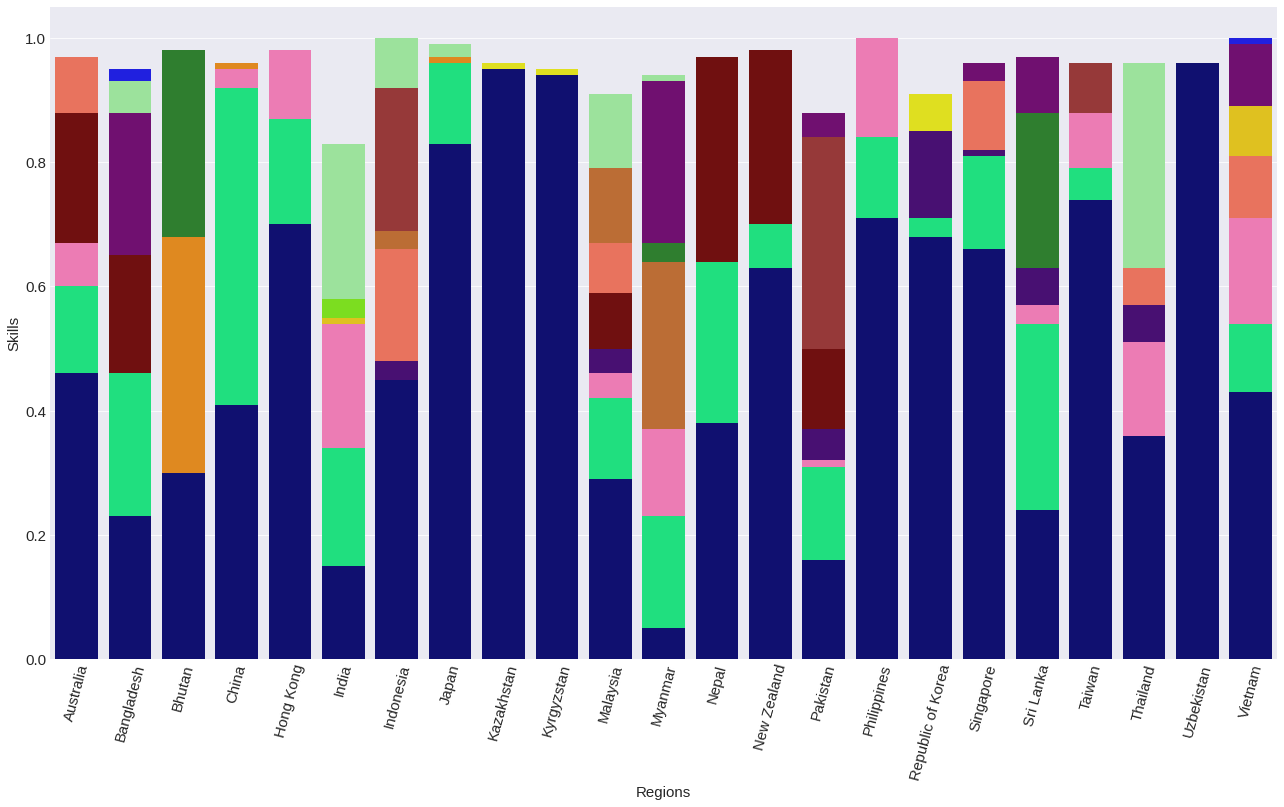

In [ ]:
plt.xticks(rotation=75)
sns.barplot(asiapaci_skills['Region'], 
                    asiapaci_skills['Accounting'], color='red')
sns.barplot(asiapaci_skills['Region'], 
                          asiapaci_skills['Communications'], color='green')
sns.barplot(asiapaci_skills['Region'], 
                                  asiapaci_skills['Entrepreneurship'], color='blue')
sns.barplot(asiapaci_skills['Region'], 
                                        asiapaci_skills['Finance'], color='orange')
sns.barplot(asiapaci_skills['Region'], 
                                          asiapaci_skills['Human Resources'], color='yellow')
sns.barplot(asiapaci_skills['Region'], 
                                       asiapaci_skills['Leadership'], color='aqua')
sns.barplot(asiapaci_skills['Region'], 
                                     asiapaci_skills['Marketing'], color='coral')
sns.barplot(asiapaci_skills['Region'],  
                                       asiapaci_skills['Sales'], color='lightblue')
sns.barplot(asiapaci_skills['Region'],
                                          asiapaci_skills['Strategy &\nOperations'], color='lime')
sns.barplot(asiapaci_skills['Region'], 
                                                asiapaci_skills['Cloud Computing'], color='lightgreen')
sns.barplot(asiapaci_skills['Region'], 
                                              asiapaci_skills['Computer Networking'], color='purple')
sns.barplot(asiapaci_skills['Region'], 
                                    asiapaci_skills['Computer Programming'], color='fuchsia')
sns.barplot(asiapaci_skills['Region'],
                          asiapaci_skills['Databases'], color='deeppink')
sns.barplot(asiapaci_skills['Region'], 
                                          asiapaci_skills['Mobile Development'], color='crimson')
sns.barplot(asiapaci_skills['Region'], 
                                  asiapaci_skills['Operating Systems'], color='lawngreen')
sns.barplot(asiapaci_skills['Region'],
                                            asiapaci_skills['Security Engineering'], color='forestgreen')
sns.barplot(asiapaci_skills['Region'], 
                                    asiapaci_skills['Software Engineering'], color='gold')
sns.barplot(asiapaci_skills['Region'], 
                                              asiapaci_skills['Theoretical Computer Science'], color='darkorange')
sns.barplot(asiapaci_skills['Region'], 
                                asiapaci_skills['Web Development'], color='brown')
sns.barplot(asiapaci_skills['Region'], 
                                              asiapaci_skills['Data Analysis'], color='chocolate')
sns.barplot(asiapaci_skills['Region'], 
                      asiapaci_skills['Data Management'], color='tomato')
sns.barplot(asiapaci_skills['Region'],
                                                    asiapaci_skills['Data Visualization'], color='maroon')
sns.barplot(asiapaci_skills['Region'], 
                          asiapaci_skills['Machine Learning'], color='indigo')
sns.barplot(asiapaci_skills['Region'], 
                                              asiapaci_skills['Mathematics'], color='hotpink')
sns.barplot(asiapaci_skills['Region'], 
                                    asiapaci_skills['Probability & Statistics'], color='springgreen')
sns.barplot(asiapaci_skills['Region'], 
                                              asiapaci_skills['Statistical Programming'], color='navy')
plt.xlabel('Regions')
plt.ylabel('Skills')
#plt.legend(['Business', 'Technology', 'Data Science'])


In [ ]:
asia_ranking.head(5)

,Region,Business,Technology,Data Science,Overall Rank,Overall Rank Business,Overall Rank Technology,Overall Rank Data Science
0,Australia,0.31,0.61,0.74,44,75,44,29
1,Bangladesh,0.59,0.38,0.38,64,46,67,67
2,Bhutan,0.18,0.14,0.03,100,89,93,106
3,China,0.85,0.21,0.81,39,17,85,21
4,Hong Kong,0.86,0.51,0.92,23,16,54,10


In [ ]:
x = asia_ranking.iloc[:,1:4]
y = asia_ranking.iloc[:,4:5]

In [ ]:
(x_train, x_test, y_train, y_test) = train_test_split(x, y, test_size=0.25)

In [ ]:
print((x_train).shape)
print((x_test).shape)
print((y_train).shape)
print((y_test).shape)

(17, 3)
(6, 3)
(17, 1)
(6, 1)


In [ ]:
lin_reg = LinearRegression()
linreg = lin_reg.fit(x_train, y_train)
linreg_pred = linreg.predict(x_test)
linreg_pred

array([[ 65.85930109],
       [ 43.34026518],
       [  7.97884677],
       [ 45.12348918],
       [ 63.80530983],
       [109.91483547]])

In [ ]:
x_train

,Business,Technology,Data Science
19,0.63,0.71,0.83
16,0.49,0.37,0.58
0,0.31,0.61,0.74
4,0.86,0.51,0.92
11,0.35,0.42,0.15
20,0.19,0.39,0.46
22,0.88,0.88,0.61
2,0.18,0.14,0.03
1,0.59,0.38,0.38
12,0.33,0.53,0.50


In [ ]:
y_train

,Overall Rank
19,25
16,63
0,44
4,23
11,79
20,76
22,20
2,100
1,64
12,62


In [ ]:
linreg.predict(x_train[0:3])

array([[26.21456781],
       [57.99108615],
       [46.2748682 ]])

In [ ]:
tree_reg = DecisionTreeRegressor()
treereg = tree_reg.fit(x_train, y_train)
treereg_pred = treereg.predict(x_test)
treereg_pred

array([ 69.,  44.,  10.,  69.,  69., 100.])

In [ ]:
treereg.predict(x_train[0:10])

array([ 25.,  63.,  44.,  23.,  79.,  76.,  20., 100.,  64.,  62.])

In [ ]:
linreg.coef_

array([[-35.85880855, -46.73129466, -43.47057984]])

In [ ]:
linreg.intercept_

array([118.06541768])

In [ ]:
linreg.rank_

3

In [ ]:
linreg.score(x_test, y_test)

0.9893422067320079

In [ ]:
treereg.score(x_test, y_test)

0.8813936695149838